<a href="https://colab.research.google.com/github/AMMLRepos/salary-prediction-engineering-graduates/blob/main/Engineering_Graduates_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective 
To predict the salary of Engineering graduates based on the past public data provided by Aspiring Minds Research. 

# Dataset 
Dataset is publicly available on [Kaggle](https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction) and is provided by Aspiring Minds Research.

#Target Variable 
Salary is the target variable and all other significant features will be input variable

# Data Columns
- ID: A unique ID to identify a candidate
- Salary: Annual CTC offered to the candidate (in INR)
- Gender: Candidate's gender
- DOB: Date of birth of the candidate
- 10percentage: Overall marks obtained in grade 10 examinations
- 10board: The school board whose curriculum the candidate followed in grade 10
- 12graduation: Year of graduation - senior year high school
- 12percentage: Overall marks obtained in grade 12 examinations
- 12board: The school board whose curriculum the candidate followed
- CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
- CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- Degree: Degree obtained/pursued by the candidate
- Specialization: Specialization pursued by the candidate
- CollegeGPA: Aggregate GPA at graduation
- CollegeCityID: A unique ID to identify the city in which the college is located in.
- CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- CollegeState: Name of the state in which the college is located
- GraduationYear: Year of graduation (Bachelor's degree)
- English: Scores in AMCAT English section
- Logical: Score in AMCAT Logical ability section
- Quant: Score in AMCAT's Quantitative ability section
- Domain: Scores in AMCAT's domain module
- ComputerProgramming: Score in AMCAT's Computer programming section
- ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
- ComputerScience: Score in AMCAT's Computer Science section
- MechanicalEngg: Score in AMCAT's Mechanical Engineering section
- ElectricalEngg: Score in AMCAT's Electrical Engineering section
- TelecomEngg: Score in AMCAT's Telecommunication Engineering section
- CivilEngg: Score in AMCAT's Civil Engineering section
- conscientiousness: Scores in one of the sections of AMCAT's personality test
- agreeableness: Scores in one of the sections of AMCAT's personality test
- extraversion: Scores in one of the sections of AMCAT's personality test
- nueroticism: Scores in one of the sections of AMCAT's personality test
- openesstoexperience: Scores in one of the sections of AMCAT's personality test

# Activities to perform 
- Install and Import required libraries 
- Download dataset 
- Load data to Python pandas 
- Perform Exploratory Data Analysis 
- Perform Data Preparation 
- Perform Data seperation into train, test and validation sets
- Train Model 
- Evaluate Model
- Improve Model

## Install and import required libraries
Install [opendatasets](https://github.com/JovianML/opendatasets) library which is an opensource library developed by [Team Jovian](https://jovian.ai) for downloading Kaggle datasets.
We need not to install other libraries as they are already provided as a part of Google Colab runtime.

In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import opendatasets as od
import os

Set us basic styling guidelines for Google colab

In [3]:
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
pd.set_option('display.width', 1000)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%load_ext google.colab.data_table

## Download the dataset 

In [4]:
dataset_url = "https://www.kaggle.com/manishkc06/engineering-graduate-salary-prediction"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aashaymaheshwari
Your Kaggle Key: ··········


100%|██████████| 172k/172k [00:00<00:00, 21.1MB/s]

In [5]:
data_dir = "./engineering-graduate-salary-prediction"
datafile = os.listdir(data_dir)[0]

filepath = data_dir + "/" + datafile
print(filepath)

./engineering-graduate-salary-prediction/Engineering_graduate_salary.csv


## Load data into Python pandas

In [6]:
engineering_df = pd.read_csv(filepath)
print(engineering_df)

          ID Gender         DOB  10percentage                       10board  12graduation  12percentage                    12board  CollegeID  CollegeTier       Degree                             Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  openess_to_experience  Salary
0     604399      f  1990-10-22         87.80                          cbse          2009         84.00                       cbse       6920            1  B.Tech/B.E.    instrumentation and control engineering       73.82           6920                1           Delhi            2013      650      665    810  0.694479                  485                    366               -1              -1              -1           -1         -1            -0.1590         0.3

## Have a look at the data 
As a part of EDA, let us get following - 
- Basic meta information on the dataset 
- Plot visualizations to understand how features are correlated 
- Get the correlation matrix 
- Plot the heatmap of correlation matrix 

In [7]:
engineering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

- We have 34 columns with 2998 rows and datatypes of int, fload, and string(object) types
- We have 796 KB of data 



Let us get the basic statistics of the numerical columns we have in our dataset using describe()

In [8]:
engineering_df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


As shown in the output above, we have - 
- Max values for each numerical column
- Min value for each numerical column 
- Range of min and max 
- Average/mean 
- Standard deviation 


## Perform data preparation and cleaning 
Preparing data for exploratory data analysis is a required step which includes removing unnecessary columns, deal with missing values and anamolies, etc. 
Let us print our dataset 

In [19]:
print(engineering_df)

          ID Gender         DOB  10percentage                       10board  12graduation  12percentage                    12board  CollegeID  CollegeTier       Degree                             Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  openess_to_experience  Salary
0     604399      f  1990-10-22         87.80                          cbse          2009         84.00                       cbse       6920            1  B.Tech/B.E.    instrumentation and control engineering       73.82           6920                1           Delhi            2013      650      665    810  0.694479                  485                    366               -1              -1              -1           -1         -1            -0.1590         0.3

Based on the outcome above, we dont need ID column and hence we will drop it

In [22]:
engineering_df = engineering_df.drop("ID", axis = 1)

In [23]:
print(engineering_df)

     Gender         DOB  10percentage                       10board  12graduation  12percentage                    12board  CollegeID  CollegeTier       Degree                             Specialization  collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  openess_to_experience  Salary
0         f  1990-10-22         87.80                          cbse          2009         84.00                       cbse       6920            1  B.Tech/B.E.    instrumentation and control engineering       73.82           6920                1           Delhi            2013      650      665    810  0.694479                  485                    366               -1              -1              -1           -1         -1            -0.1590         0.3789        1.239

Let us know check if we have any empty values in the dataset and we can simply get that information using info()

In [24]:
engineering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeID              2998 non-null   int64  
 8   CollegeTier            2998 non-null   int64  
 9   Degree                 2998 non-null   object 
 10  Specialization         2998 non-null   object 
 11  collegeGPA             2998 non-null   float64
 12  CollegeCityID          2998 non-null   int64  
 13  CollegeCityTier        2998 non-null   int64  
 14  CollegeState           2998 non-null   object 
 15  Grad

We can see that no columns has empty values and hence we need not do anything special here. We can also drop CollegeCityID, CollegeID from the list

In [25]:
engineering_df = engineering_df.drop(["CollegeCityID", "CollegeID"], axis = 1)

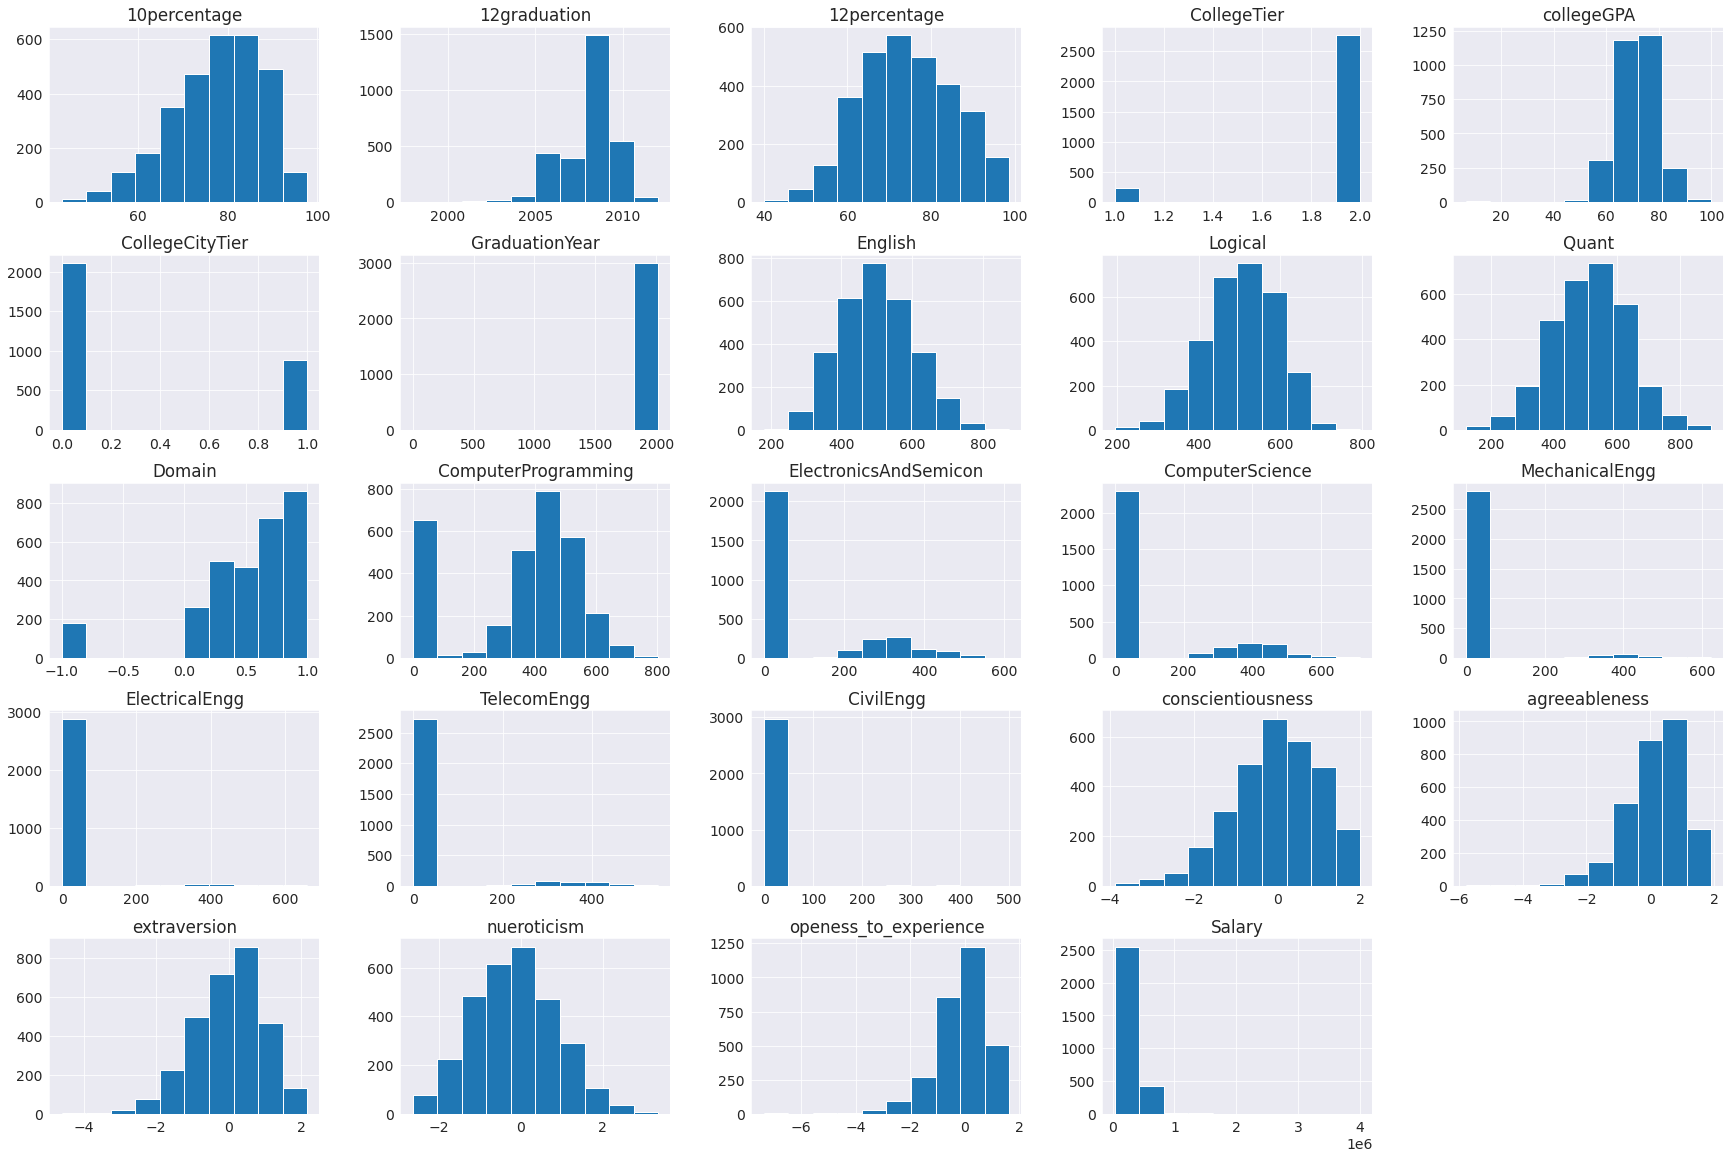

In [29]:
engineering_df.hist(bins = 10, figsize=(30,20));

In [30]:
corr_matrix = engineering_df.corr()
print(corr_matrix)

                       10percentage  12graduation  12percentage  CollegeTier  collegeGPA  CollegeCityTier  GraduationYear   English   Logical     Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  openess_to_experience    Salary
10percentage               1.000000      0.273813      0.645578    -0.144178    0.311209         0.114770       -0.017208  0.348452  0.309558  0.328888  0.079927             0.052249               0.091123        -0.013196        0.053343        0.065815     0.049500   0.021410           0.066644       0.136332     -0.007811    -0.131151               0.034869  0.181414
12graduation               0.273813      1.000000      0.255780     0.004834    0.059786         0.005517        0.006758  0.157822  0.103767  0.007854 -0.038321            -0.049095              -0.005440         0.295062        0.025015        0.124642

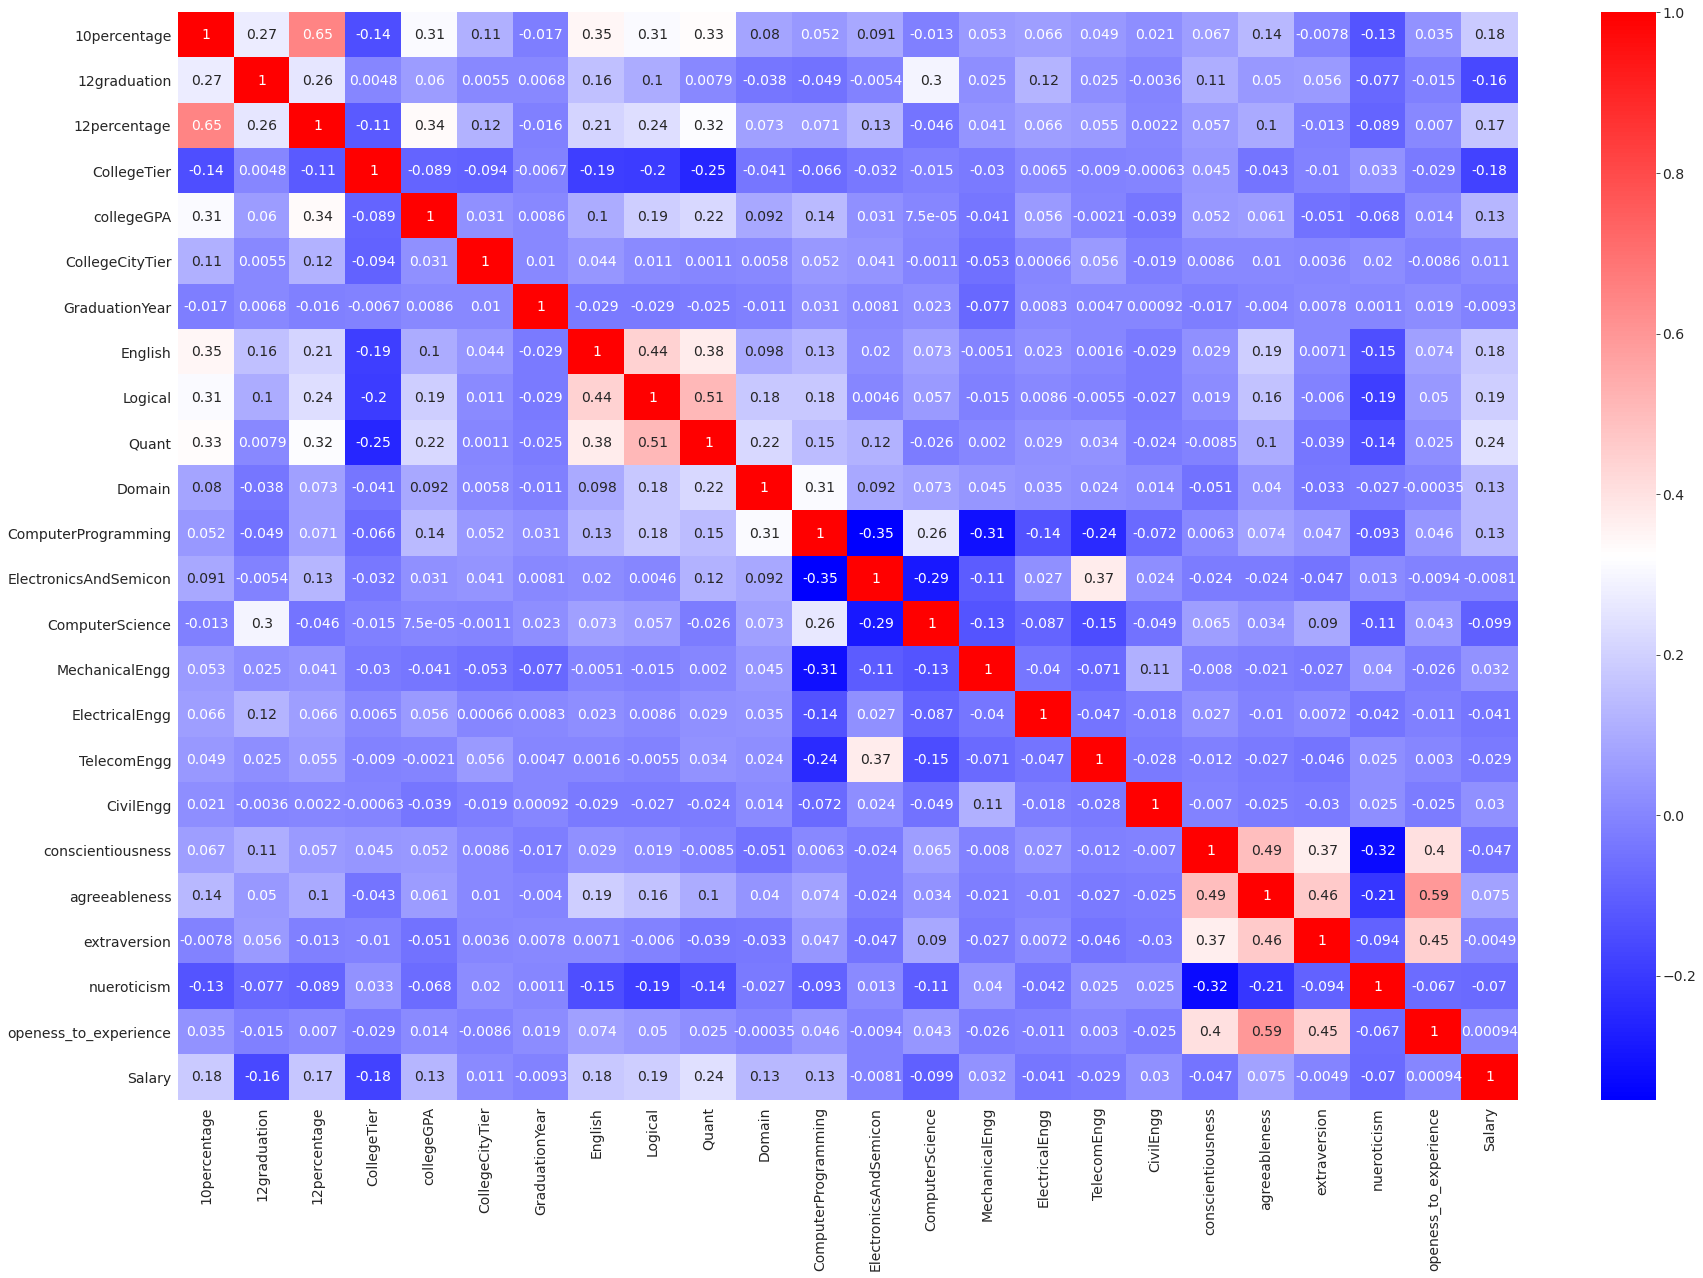

In [37]:
plt.figure(figsize = (30,20))
sns.heatmap(corr_matrix, annot=True, cmap = "bwr");

Surprisingly, none of the features has major correlation with Salary which simply signifies that not alone but many features combined together to contribute in the prediction of salary

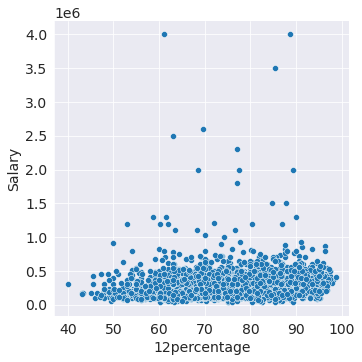

In [9]:
sns.relplot(x = "12percentage", y = "Salary", data = engineering_df);

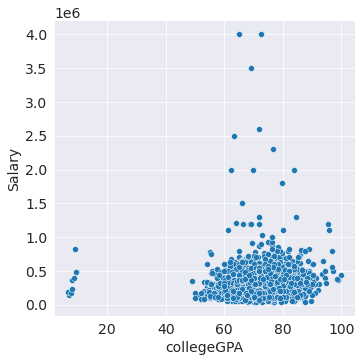

In [10]:
sns.relplot(x = "collegeGPA", y = "Salary", data = engineering_df);

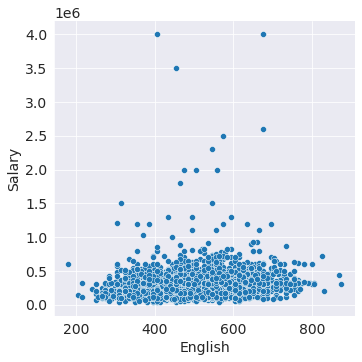

In [11]:
sns.relplot(x = "English", y = "Salary", data = engineering_df);

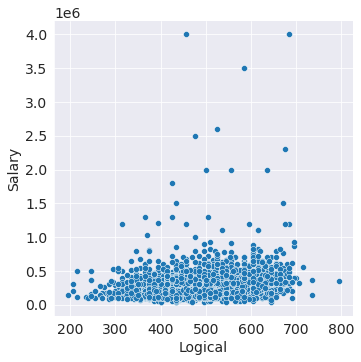

In [12]:
sns.relplot(x = "Logical", y = "Salary", data = engineering_df);

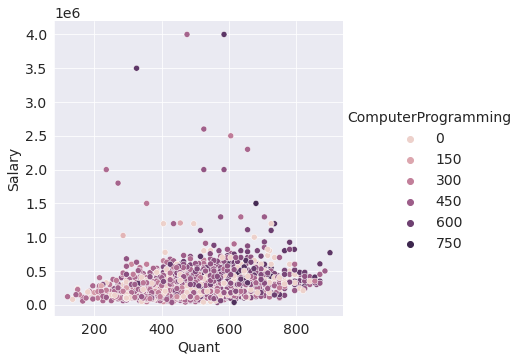

In [18]:

sns.relplot(x = "Quant", y = "Salary", data = engineering_df, hue = "ComputerProgramming");

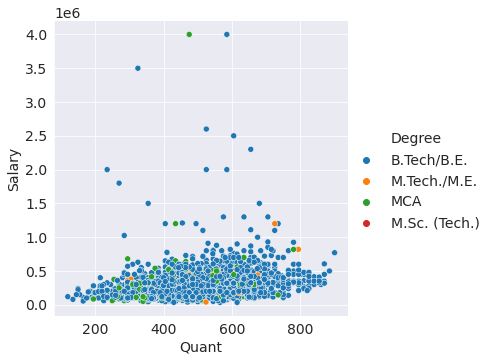

In [17]:
sns.relplot(x = "Quant", y = "Salary", data = engineering_df, hue = "Degree");

- AS observed no single input variable has direct implications on the salary of a graduate 
- We also observed correlation matrix which too indicated that a single feature will not impact the salary prediction. Its the combination of all input variables which will lead to right predictions. 

## Data Preparation and Feature Engineering
Preparing data for Machine Learning algorithm is another critial step.
**Feature Engineering** is an activity to add more features from an existing input variable list. There are input variables which may not make sense along or together which then can be seperated to new features which will impact the outcome of predictions 

We perform following major steps for data preparation- 
- Remove columns which are not required or does not impact the salary prediction
- Convert categorical values to numerical values 
- Perform Encoding to ensure that categorical values are hot encoded 
- Perform scaling where we convert each numerical value in the range of 0 to 1


Let us have a look at 10 samples of data 

### Removing columns
It is important to choose columns which must be removed before being fed to Machine Learning algorithm. Remove depends on various scenarios as 
- Some columns or input variables will have an impact only if we have data to support their impact. For example, Graduation Year is a critical aspect to predict salary as there might be marked ups and downs in some years compared to others. Also, with inflation, salary given in 2005 will be much different from the salary which is given in the year 2015.But we do not have that data and hence we should first try to make our prediction model without having this input variable. So columns which then can be removed are - CollegeState, GraduationYear, GraduationYear


In [43]:
remove_columns = ["CollegeState", "GraduationYear", "GraduationYear", "DOB"]
engineering_df = engineering_df.drop(remove_columns, axis = 1 )

In [44]:
engineering_df.sample(10)

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
2037,m,78.00,icse,2006,83.00,isc,1,B.Tech/B.E.,computer engineering,81.80,0,715,535,635,0.995465,685,-1,-1,-1,-1,-1,-1,-0.5719,0.9688,0.6720,-0.5253,-0.6035,460000
2912,f,79.00,cbse,2012,74.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,64.40,0,535,475,515,0.376060,-1,300,-1,-1,-1,340,-1,0.2718,0.7119,0.9322,-0.3612,-0.6692,300000
2067,m,77.00,icse,2009,66.00,icse,2,B.Tech/B.E.,electrical engineering,78.00,1,580,530,465,0.062221,405,-1,-1,-1,260,-1,-1,0.8463,1.2114,1.2396,-0.8682,0.6721,335000
334,m,89.17,state board,2010,96.00,state board,2,B.Tech/B.E.,mechanical engineering,84.90,0,490,570,665,0.996536,385,-1,-1,623,-1,-1,-1,0.1282,0.5454,-0.4511,-1.6289,0.6721,325000
2213,f,88.00,cbse,2011,85.00,cbse,1,B.Tech/B.E.,computer science & engineering,68.00,1,615,605,595,0.525923,415,-1,-1,-1,-1,-1,-1,-2.1698,0.3789,-0.6048,2.3010,-0.8608,700000
2620,m,86.20,cbse,2008,91.33,stateboard/tamil nadu,2,B.Tech/B.E.,computer science & engineering,84.00,1,465,415,530,0.563268,425,-1,-1,-1,-1,-1,-1,-2.2720,-0.9033,-0.6343,0.4148,-1.4724,400000
746,f,67.00,cbse,2010,63.33,cbse,2,B.Tech/B.E.,electronics and communication engineering,65.18,0,420,470,440,0.493596,315,324,-1,-1,-1,356,-1,0.2718,1.0449,0.7785,-1.2486,-0.4776,185000
1768,m,81.30,wbbse,2006,76.30,wbchse,2,B.Tech/B.E.,electrical engineering,78.00,1,545,505,525,0.229482,395,266,-1,-1,-1,-1,-1,-0.5719,0.6568,-0.3440,-0.6428,-0.4455,260000
1629,f,83.00,cbse,2010,72.00,cbse,2,B.Tech/B.E.,electronics & telecommunications,76.00,0,525,530,405,0.338786,335,292,-1,-1,-1,388,-1,-0.1590,0.3789,-2.4491,-0.8682,0.2889,225000
372,m,64.20,cbse,2009,90.70,state board,2,B.Tech/B.E.,electronics and communication engineering,82.23,1,510,605,720,0.960603,565,466,-1,-1,-1,-1,-1,0.5591,-0.7866,-0.4511,0.1459,0.2889,325000
